# Bilden eines Models mit Original und einem Filter

## Import der notwendigen Pakete

In [1]:
# Import Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## GPU-Test

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available", len(physical_devices))

Num GPUs Available 1


## Helper

In [3]:
model_path = "./keras_ein_filter_ein_original.hdf5"
import os.path

def isModelAvailable():
    return os.path.isfile(model_path) 

startTraining = True

## Import des Datasets

Zusätzlich zum Laden des Datasets (2 Klassen) wird hier bereits durch den ImageDataGenerator ein Preprocessing durchgeführt / vorbereitet.
Zunächst wird versucht eine Klassifizierung durchzuführen, bei dem die Bilder in Graustufen geladen werden.

In [4]:
classes = ["Origin", "Amaro"]; # choosen classes (origin + filter) for classification

directory = "./FACD_image" # dataset dir
target_size = (400,400)    # size of train and test data (vgg16)
seed = 42;                 # seed to reproduce same results
batch_size=32              # trainings batch size

# create a image generator for keras, that can load and prepare images batchwise
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# create two directory iterators (one for test and one for train data)
train_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    directory, data_generator, target_size=target_size, color_mode='grayscale',
    classes=classes, class_mode='categorical', batch_size=batch_size, shuffle=True, seed=seed,
    follow_links=False, subset='training', interpolation='nearest', dtype=None
)

test_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    directory, data_generator, target_size=target_size, color_mode='grayscale',
    classes=classes, class_mode='categorical', batch_size=batch_size, shuffle=True, seed=seed,
    follow_links=False, subset='validation', interpolation='nearest', dtype=None
)


Found 2048 images belonging to 2 classes.
Found 512 images belonging to 2 classes.


## Erstellen des CNN-Models

In [5]:
input_shape = (400,400,1) # input shape for data -> grayscale
num_classes = len(classes)

# metrics we want to record
metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]

# building the keras model
model = tf.keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 614656)            0         
_________________________________________________________________
dropout (Dropout)            (None, 614656)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1

## Trainieren des Models

Das Warning "This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling" kommt von den nicht gefitteten Bildern des DataGenerators. Normalerweise führt man "data_generator.fit()" vor dem fitten des Modells durch. In der [Doku des DictornaryIterators](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/DirectoryIterator) steht jedoch, dass das durch das übergebene ImageDateGenerator-Objekt eine Standardisierung und Transformation durchgeführt wird. Aus diesem Grund wird dieses Warning an dieser Stelle ignoriert.

In [6]:
epochs = 10
validation_freq = 1
if not isModelAvailable() or startTraining:
    history = model.fit(
        x=train_iterator, y=None, epochs=epochs, verbose=1, callbacks=None,
        validation_data=test_iterator, initial_epoch=0, steps_per_epoch=len(train_iterator), validation_freq=validation_freq,
        max_queue_size=10
    )

C:\Users\Martin\anaconda3\envs\ml\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Martin\anaconda3\envs\ml\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 64 steps, validate for 16 steps
Epoch 1/10


C:\Users\Martin\anaconda3\envs\ml\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Martin\anaconda3\envs\ml\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


27/64 [===========>..................] - ETA: 22s - loss: 120.7760 - categorical_accuracy: 0.6100 - precision: 0.6100 - recall: 0.6100

C:\Users\Martin\anaconda3\envs\ml\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19273 bytes but only got 816. Skipping tag 700
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Martin\anaconda3\envs\ml\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5140 bytes but only got 816. Skipping tag 34377
  " Skipping tag %s" % (size, len(data), tag)
C:\Users\Martin\anaconda3\envs\ml\lib\site-packages\PIL\TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3144 bytes but only got 816. Skipping tag 34675
  " Skipping tag %s" % (size, len(data), tag)


64/64 [==============================] - 46s 718ms/step - loss: 51.3391 - categorical_accuracy: 0.7310 - precision: 0.7310 - recall: 0.7310 - val_loss: 0.4813 - val_categorical_accuracy: 0.8555 - val_precision: 0.8555 - val_recall: 0.8555
Epoch 2/10
64/64 [==============================] - 41s 646ms/step - loss: 0.4130 - categorical_accuracy: 0.9009 - precision: 0.9009 - recall: 0.9009 - val_loss: 0.3486 - val_categorical_accuracy: 0.9277 - val_precision: 0.9277 - val_recall: 0.9277
Epoch 3/10
64/64 [==============================] - 43s 664ms/step - loss: 0.3011 - categorical_accuracy: 0.9258 - precision: 0.9258 - recall: 0.9258 - val_loss: 0.3061 - val_categorical_accuracy: 0.9395 - val_precision: 0.9395 - val_recall: 0.9395
Epoch 4/10
64/64 [==============================] - 42s 653ms/step - loss: 0.2749 - categorical_accuracy: 0.9414 - precision: 0.9414 - recall: 0.9414 - val_loss: 0.2359 - val_categorical_accuracy: 0.9531 - val_precision: 0.9531 - val_recall: 0.9531
Epoch 5/10
64/

## Speichern des Modells

In [7]:
if not isModelAvailable() or startTraining:
    model.save(
       model_path, overwrite=True, include_optimizer=True, save_format="h5", signatures=None, options=None
    )

## Anzeigen der Trainings-History

Für die Anzeige der Trainingshistorie wurde eine Hilfsdatei "plot.py" geschrieben.

### Accuracy und Loss

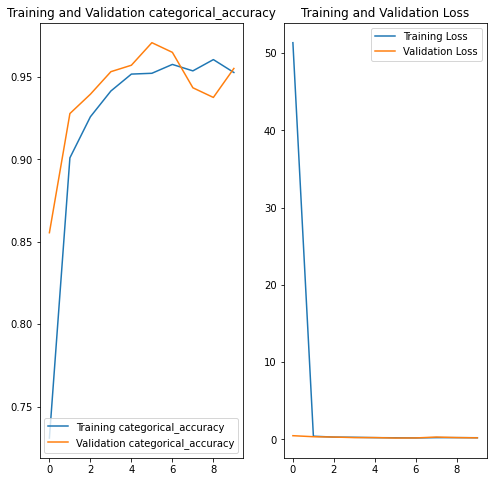

In [8]:
import plot

plot.plot_keras_history(history, len(history.epoch), metrics[0].name)

### Precision

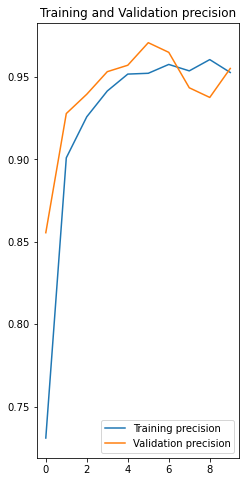

In [9]:
plot.plot_keras_history(history, epochs, metrics[1].name)

### Recall

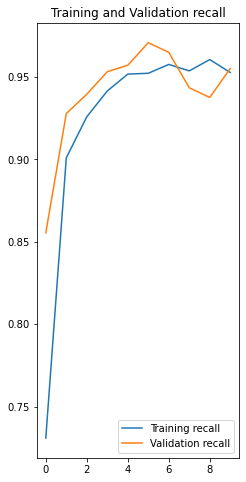

In [10]:
plot.plot_keras_history(history, epochs, metrics[2].name)